In [1]:
from google.colab import files
uploaded = files.upload() #upload heart.csv data

Saving heart.csv to heart (2).csv


In [2]:
import pandas as pd #import our libraries
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
data = pd.read_csv('heart.csv')

In [3]:
data.sample(20) #printing out a sample of our data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0


In [4]:
#renaming the data columns
data.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholestrol', 'FastingBS','Resting_ecg','MaxHeartrate', 'ExerciseInducedAngina', 'STdepression', 'STslope', 'NumMajorVessels', 'thalliumTest', 'Condition']

In [5]:
data.head() #printing the headers

,Age,Sex,ChestPainType,RestingBP,Cholestrol,FastingBS,Resting_ecg,MaxHeartrate,ExerciseInducedAngina,STdepression,STslope,NumMajorVessels,thalliumTest,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Processing

In [6]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholestrol,FastingBS,Resting_ecg,MaxHeartrate,ExerciseInducedAngina,STdepression,STslope,NumMajorVessels,thalliumTest,Condition
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

print()
print(f'Shape of the dataset')
print(f'Number of features: {data.shape[1]}')
print(f'Number of observations: {data.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Sex                    303 non-null    int64  
 2   ChestPainType          303 non-null    int64  
 3   RestingBP              303 non-null    int64  
 4   Cholestrol             303 non-null    int64  
 5   FastingBS              303 non-null    int64  
 6   Resting_ecg            303 non-null    int64  
 7   MaxHeartrate           303 non-null    int64  
 8   ExerciseInducedAngina  303 non-null    int64  
 9   STdepression           303 non-null    float64
 10  STslope                303 non-null    int64  
 11  NumMajorVessels        303 non-null    int64  
 12  thalliumTest           303 non-null    int64  
 13  Condition              303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Shape of t

In [8]:
data.isnull().sum()

Age                      0
Sex                      0
ChestPainType            0
RestingBP                0
Cholestrol               0
FastingBS                0
Resting_ecg              0
MaxHeartrate             0
ExerciseInducedAngina    0
STdepression             0
STslope                  0
NumMajorVessels          0
thalliumTest             0
Condition                0
dtype: int64

Data Analysis

In [9]:
def condition_ratio(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    """
    results = data['Condition'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']
    
    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py
    
    
condition_ratio(data);

In [10]:
def sex_ratio(data):
    """
    Make a pie chart of 'Sex' values
    Sex: 0 = Female, 1 = Male
    """
    # Pie chart of sex ratio
    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']
    
    fig_pie = go.Pie(labels=labels, values=values, 
                     marker={'colors': colors, 
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py

    
sex_ratio(data);

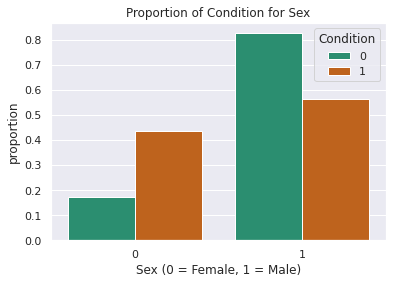

The proportion of Malignant for Sex:
Female: 43.64%
Male: 56.36%


In [11]:
def condition_proportion_sex(data):
    """
    Plot a bar chart of the proportion of Conditon vs. Sex.
    Show the percentage of Malignant for each sex.
    """
    # Bivariate analysis: Sex vs. Condition          
    data['Sex'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Sex', y='proportion', hue='Condition', palette='Dark2');
    plt.title('Proportion of Condition for Sex')
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.show()
    
    
    # Show the percentage of Malignant for Sex
    # female_malignant vs. Malignant
    female_malignant = data[data['Sex']==0]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()
    # male_malignant vs. Malignant
    male_malignant = data[data['Sex']==1]['Condition'].sum()/data[data['Condition']==1]['Condition'].count()

    print('The proportion of Malignant for Sex:')
    print(f'Female: {female_malignant:.2%}')
    print(f'Male: {male_malignant:.2%}')

    
condition_proportion_sex(data);

In [12]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholestrol', 'FastingBS',
       'Resting_ecg', 'MaxHeartrate', 'ExerciseInducedAngina', 'STdepression',
       'STslope', 'NumMajorVessels', 'thalliumTest', 'Condition'],
      dtype='object')

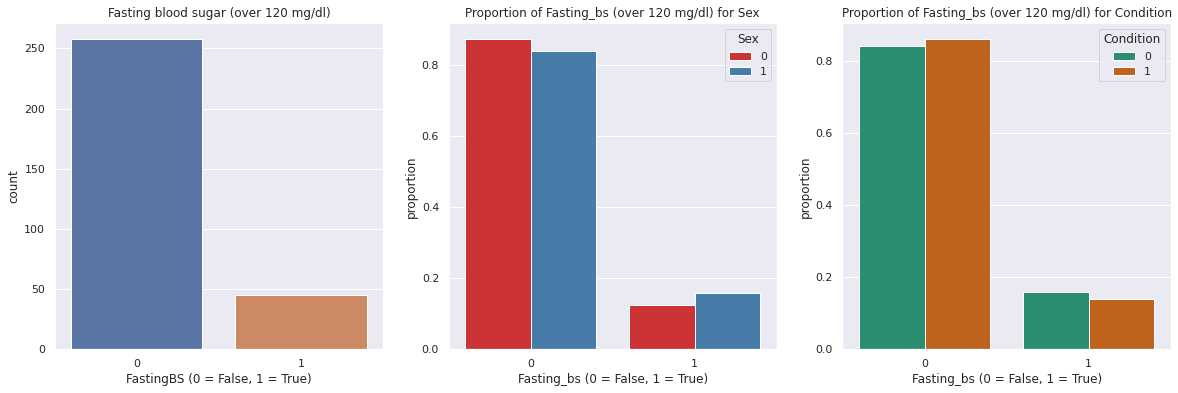

In [13]:
def risk_factors_fbs(data):

  df = data

  fig = plt.figure(figsize=(20, 6))

  #fasting blood sugar > 120mg/dl


  plt.subplot(1, 3, 1)
  sns.countplot(x='FastingBS', data=data)
  plt.title('Fasting blood sugar (over 120 mg/dl)')
  plt.xlabel('FastingBS (0 = False, 1 = True)')

#fasting blood sugar for Sex

  plt.subplot(1, 3, 2)
  df['FastingBS'].groupby(df['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), 
                                                                                                           x='FastingBS', 
                                                                                                           y='proportion', 
                                                                                                           hue='Sex', 
                                                                                                           palette='Set1')
  plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Sex')
  plt.xlabel('Fasting_bs (0 = False, 1 = True)')

#fasting blood sugar for Condition

  plt.subplot(1, 3, 3)
  df['FastingBS'].groupby(df['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), 
                                                                                                                 x='FastingBS', 
                                                                                                                 y='proportion', 
                                                                                                                 hue='Condition', 
                                                                                                                 palette='Dark2')
  plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Condition')
  plt.xlabel('Fasting_bs (0 = False, 1 = True)')
  plt.show()

risk_factors_fbs(data);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:

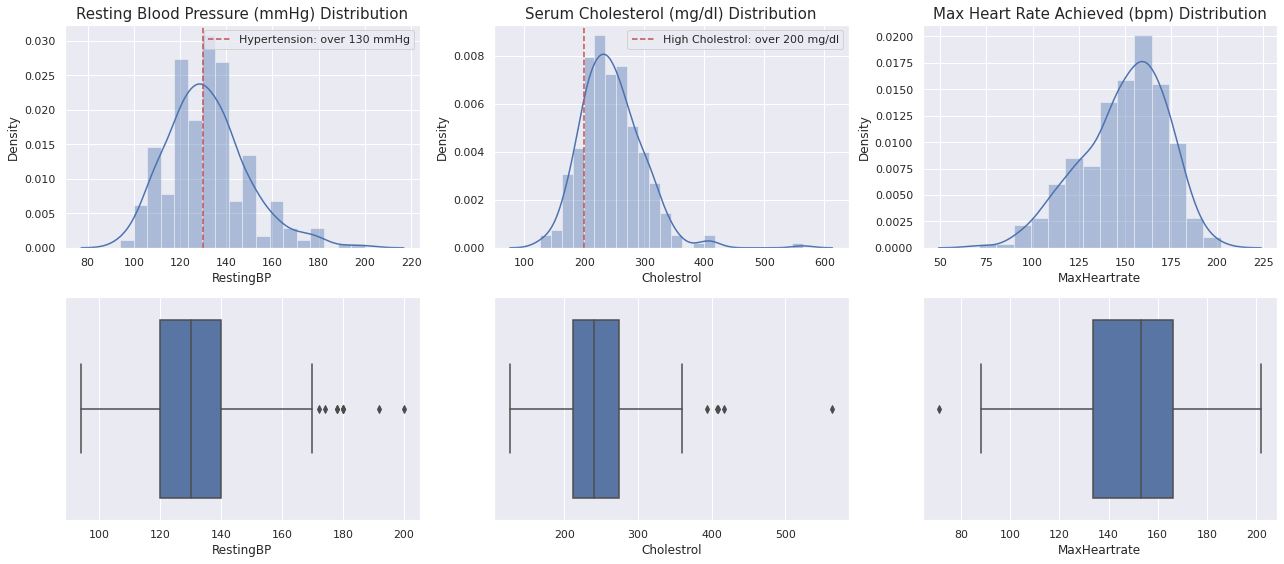

In [14]:
def risk_factors_dist(data):

  fig = plt.figure(figsize=(18, 8))

  # Resting blood pressure
  plt.subplot(2, 3, 1)
  sns.distplot(data['RestingBP'])
  plt.title('Resting Blood Pressure (mmHg) Distribution', 
            fontsize=15)
  plt.axvline(x=130, 
              color='r', 
              linestyle='--', 
              label='Hypertension: over 130 mmHg')
  plt.legend()
  plt.subplot(2, 3, 4)
  sns.boxplot(data['RestingBP'], 
              orient='h') 
  
  # Serum cholesterol
  plt.subplot(2, 3, 2)
  sns.distplot(data['Cholestrol'])
  plt.title('Serum Cholesterol (mg/dl) Distribution', 
            fontsize=15)
  plt.axvline(x=200, 
              color='r', 
              linestyle='--', 
              label='High Cholestrol: over 200 mg/dl')
  plt.legend()

  plt.subplot(2, 3, 5)
  sns.boxplot(data['Cholestrol'], 
              orient='h')
  
  # Maximum heart rate
  plt.subplot(2, 3, 3)
  sns.distplot(data['MaxHeartrate'])
  plt.title('Max Heart Rate Achieved (bpm) Distribution', 
            fontsize=15)
  
  plt.subplot(2, 3, 6)
  sns.boxplot(data['MaxHeartrate'], 
              orient='h')
  
  plt.tight_layout()
  plt.show()

risk_factors_dist(data);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

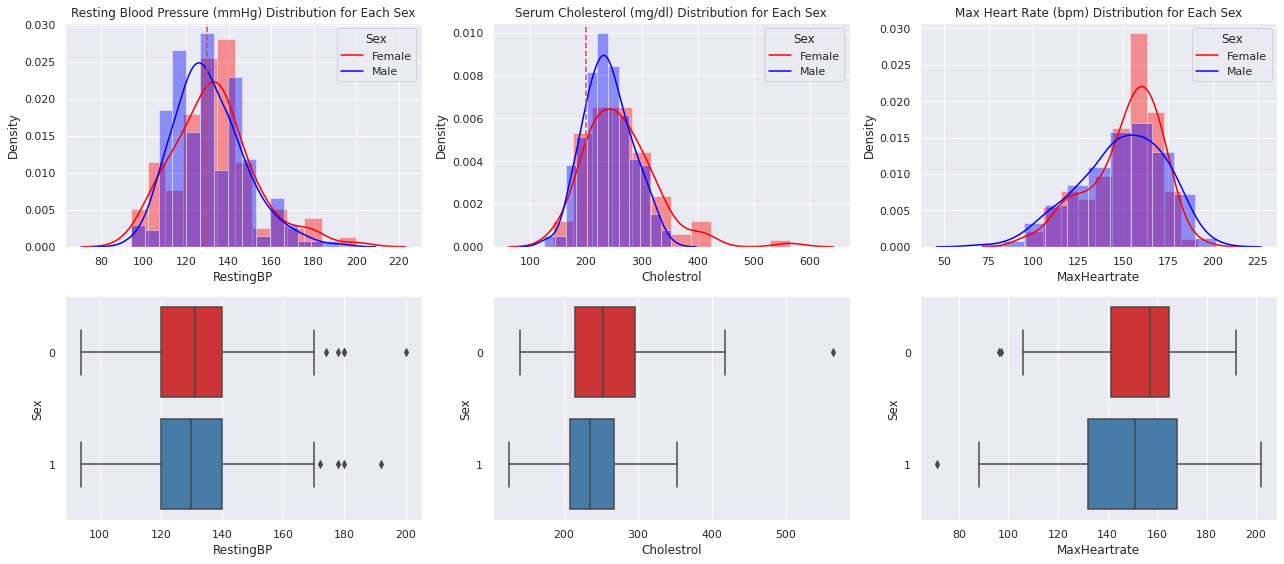

In [15]:
def risk_factors_dist_sex(data):
    """
    Show distributions of risk factors for each sex
    """
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    trestbps_female = data[data['Sex']==0]['RestingBP']
    trestbps_male = data[data['Sex']==1]['RestingBP']
    sns.distplot(trestbps_female, 
                 color='Red')   
    sns.distplot(trestbps_male, 
                 color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Sex', 
                     labels=['Female','Male'])
    plt.axvline(x=130, 
                color='r', 
                linestyle='--', 
                label='Hypertension: over 130 mmHg')
    
    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['RestingBP'], 
                y=data['Sex'], 
                palette='Set1', 
                orient='h')
    
    
    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Sex']==0]['Cholestrol']
    chol_male = data[data['Sex']==1]['Cholestrol']
    sns.distplot(chol_female, color='Red')   
    sns.distplot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Sex', 
                     labels=['Female','Male'])
    plt.axvline(x=200, 
                color='r', 
                linestyle='--', 
                label='High Cholesterol: over 200 mg/dl')
    
    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholestrol'], 
                y=data['Sex'], 
                palette='Set1', 
                orient='h')
    
    
    # Max heart rate distribution for each sex 
    plt.subplot(2, 3, 3)
    thalach_female = data[data['Sex']==0]['MaxHeartrate']
    thalach_male = data[data['Sex']==1]['MaxHeartrate']
    sns.distplot(thalach_female, 
                 color='Red')   
    sns.distplot(thalach_male, 
                 color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Sex', 
                     labels=['Female','Male'])
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['MaxHeartrate'], 
                y=data['Sex'], 
                palette='Set1', 
                orient='h')
    
    plt.tight_layout()
    plt.show()
    
    
risk_factors_dist_sex(data);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

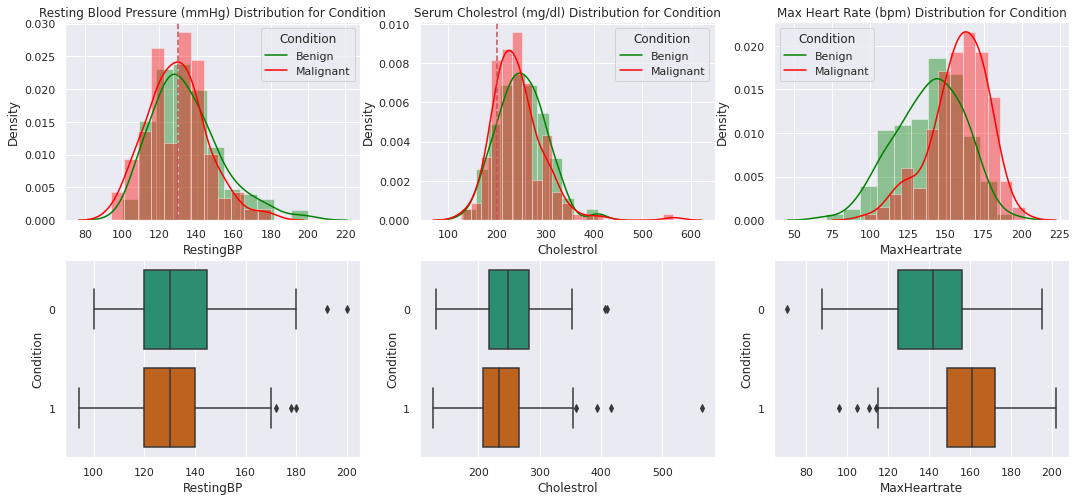

In [16]:
def risk_factors_dist_condition(data):
    """
    Show distributions of risk factors for each condition
    """
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure distribution for each condition
    plt.subplot(2, 3, 1)
    trestbps_b = data[data['Condition']==0]['RestingBP']
    trestbps_m = data[data['Condition']==1]['RestingBP']
    sns.distplot(trestbps_b, 
                 color='Green')   
    sns.distplot(trestbps_m, 
                 color='Red')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition',
                     labels=['Benign',
                                                'Malignant'])  
    plt.axvline(x=130, 
                color='r', 
                linestyle='--', 
                label='Hypertension: over 130 mmHg')
    
    plt.subplot(2, 3, 4)
    sns.boxplot(x=data['RestingBP'], 
                y=data['Condition'], 
                orient='h', 
                palette='Dark2')
    
    
    # Serum cholesterol distribution for each condition
    plt.subplot(2, 3, 2)
    chol_b = data[data['Condition']==0]['Cholestrol']
    chol_m = data[data['Condition']==1]['Cholestrol']
    sns.distplot(chol_b, 
                 color='Green')
    sns.distplot(chol_m, 
                 color='Red')
    plt.title('Serum Cholestrol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition', labels=['Benign',
                                                'Malignant'])
    plt.axvline(x=200, 
                color='r', 
                linestyle='--', 
                label='High Cholesterol: over 200 mg/dl')

    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholestrol'], 
                y=data['Condition'],
                orient='h', 
                palette='Dark2')
    
    
    # Max heart rate achieved distribution for each condition
    plt.subplot(2, 3, 3)
    thalach_b = data[data['Condition']==0]['MaxHeartrate']
    thalach_m = data[data['Condition']==1]['MaxHeartrate']
    sns.distplot(thalach_b, 
                 color='Green')
    sns.distplot(thalach_m, 
                 color='Red')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition', 
                     labels=['Benign',
                             'Malignant'])
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['MaxHeartrate'], 
                y=data['Condition'],
                orient='h', 
                palette='Dark2')
    
    
risk_factors_dist_condition(data);

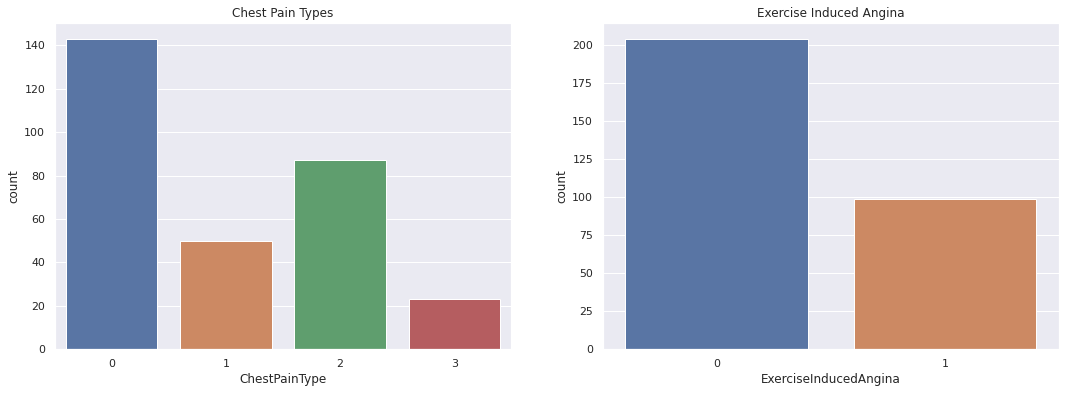

In [17]:
def symptoms_features(data):

  plt.figure(figsize=(18, 6))

  plt.subplot(1, 2, 1)
  sns.countplot(x='ChestPainType', data=data)
  plt.title('Chest Pain Types')

  plt.subplot(1, 2, 2)
  sns.countplot(x='ExerciseInducedAngina', data=data)
  plt.title('Exercise Induced Angina')

symptoms_features(data);

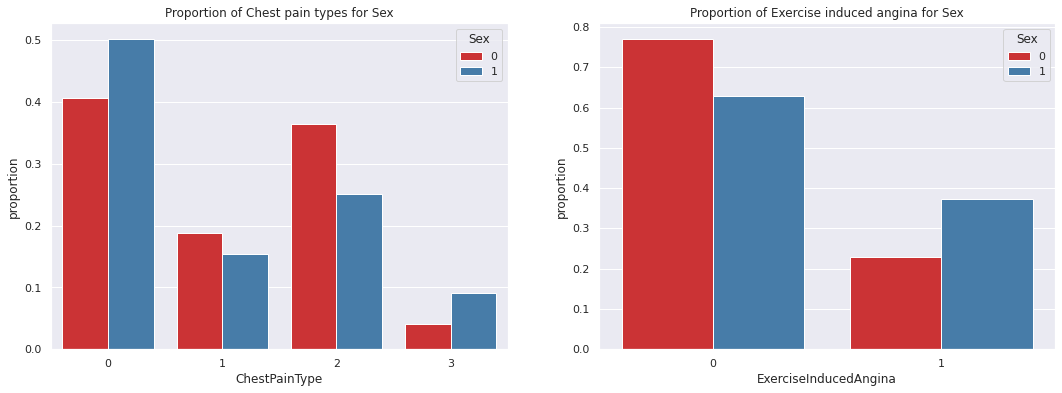

In [18]:
def symptoms_features_sex(data):

  fig = plt.figure(figsize=(18, 6))

  plt.subplot(1, 2, 1)
  data['ChestPainType'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), 
                                                                                                                    x='ChestPainType', 
                                                                                                                    y='proportion', 
                                                                                                                    hue='Sex',
                                                                                                                    palette='Set1')
  plt.title('Proportion of Chest pain types for Sex')

  plt.subplot(1, 2, 2)
  data['ExerciseInducedAngina'].groupby(data['Sex']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), 
                                                                                                                            x='ExerciseInducedAngina', 
                                                                                                                            y='proportion', 
                                                                                                                            hue='Sex',
                                                                                                                            palette='Set1')
  plt.title('Proportion of Exercise induced angina for Sex')
  plt.show()

symptoms_features_sex(data);

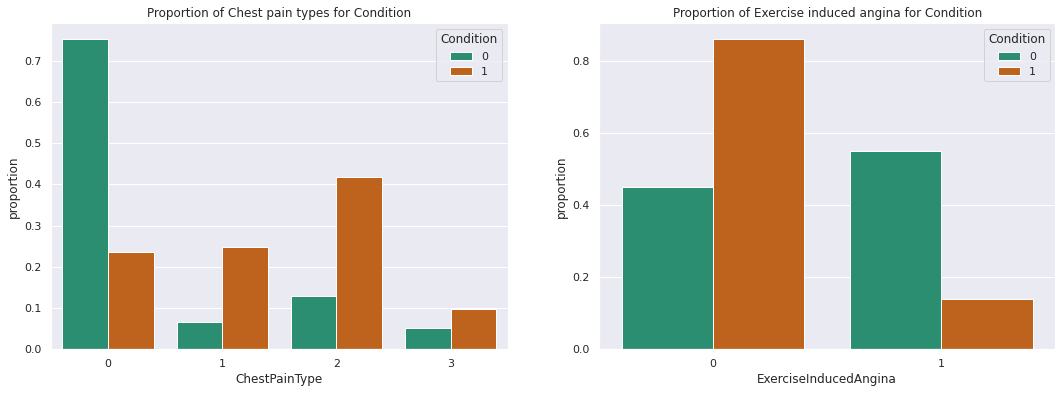

In [19]:
def symptoms_features_condition(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Condition.
    """
    fig = plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 2, 1)
    data['ChestPainType'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), 
                                                                                                                            x='ChestPainType', 
                                                                                                                            y='proportion', 
                                                                                                                            hue='Condition', 
                                                                                                                            palette='Dark2')
    plt.title('Proportion of Chest pain types for Condition')
    
    plt.subplot(1, 2, 2)
    data['ExerciseInducedAngina'].groupby(data['Condition']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), 
                                                                                                                                    x='ExerciseInducedAngina', 
                                                                                                                                    y='proportion', 
                                                                                                                                    hue='Condition', 
                                                                                                                                    palette='Dark2')
    plt.title('Proportion of Exercise induced angina for Condition')
    plt.show()
    
    
symptoms_features_condition(data);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.p

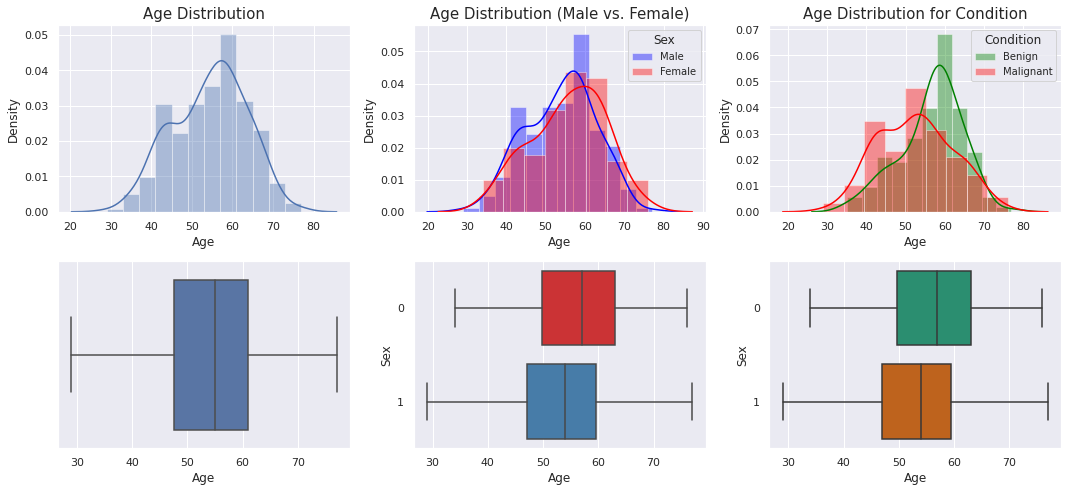

In [20]:
def age_distribution(df):

  fig = plt.figure(figsize=(15, 7))

  plt.subplot(2, 3, 1)
  sns.distplot(data['Age']) 
  plt.title('Age Distribution', fontsize=15)

  plt.subplot(2, 3, 4)
  sns.boxplot(data['Age'], orient='h')

  plt.subplot(2, 3, 2)
  female = df[df['Sex']==0]['Age']
  male = df[df['Sex']==1]['Age']
  sns.distplot(male, color='Blue', label='Male')
  sns.distplot(female, color='Red', label='Female')
  plt.title('Age Distribution (Male vs. Female)', fontsize=15)
  plt.legend(title='Sex', fontsize=10)

  plt.subplot(2, 3, 5)
  sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Set1')

  plt.subplot(2, 3, 3)
  benign = df[df['Condition']==0]['Age']
  malignant = df[df['Condition']==1]['Age']

  sns.distplot(benign, color='Green', label='Benign')
  sns.distplot(malignant, color='Red', label='Malignant')
  plt.title('Age Distribution for Condition', fontsize=15)
  plt.legend(title='Condition', fontsize=10)

  plt.subplot(2, 3, 6)
  sns.boxplot(x=data['Age'], y=data['Sex'], orient='h', palette='Dark2')

  plt.tight_layout()
  plt.show()

age_distribution(data);




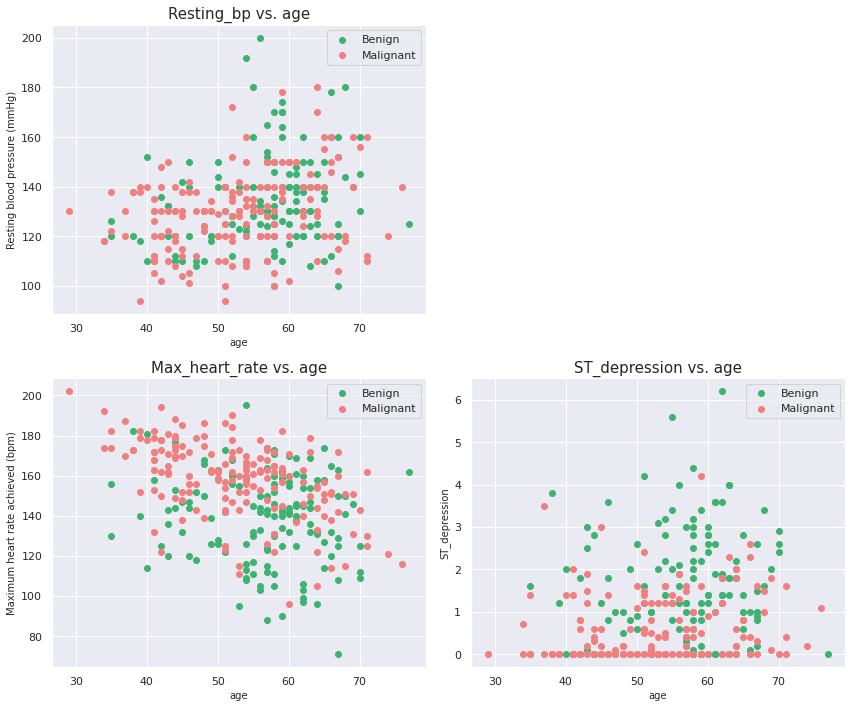

In [21]:
def numeric_features_vs_age(data): 
  benign = data.Condition==0
  malignant = data.Condition==1

  age_benign = data.Age[benign]
  age_malignant = data.Age[malignant]

  b_color = 'MediumSeaGreen'
  m_color = 'LightCoral'

  fig = plt.figure(figsize=(12, 10))

  plt.subplot(2, 2, 1)
  plt.scatter(x=age_benign, y=data.RestingBP[benign], color=b_color)
  plt.scatter(x=age_malignant, y=data.RestingBP[malignant], color=m_color)
  plt.title('Resting_bp vs. age', fontsize=15)
  plt.legend(['Benign', 'Malignant'])
  plt.xlabel('age', fontsize=10)
  plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)

  plt.subplot(2, 2, 3)
  plt.scatter(x=age_benign, y=data.MaxHeartrate[benign], color=b_color)
  plt.scatter(x=age_malignant, y=data.MaxHeartrate[malignant], color=m_color)
  plt.title('Max_heart_rate vs. age', fontsize=15)
  plt.legend(['Benign', 'Malignant'])
  plt.xlabel('age',fontsize=10)
  plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)

  plt.subplot(2, 2, 4)
  plt.scatter(x=age_benign, y=data.STdepression[benign], color=b_color)
  plt.scatter(x=age_malignant, y=data.STdepression[malignant], color=m_color)
  plt.title('ST_depression vs. age', fontsize=15)
  plt.legend(['Benign', 'Malignant'])
  plt.xlabel('age',fontsize=10)
  plt.ylabel('ST_depression', fontsize=10)

  plt.tight_layout()
  plt.show()


numeric_features_vs_age(data);





In [22]:
y = data.Condition.values
print(y)
x= data.drop(["Condition"], axis =1)
print(x)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
     Age  Sex  ChestPainType  RestingBP  Cholestrol  FastingBS  Resting_ecg  \
0     63    1              3        145         233          1            0   
1     37    1              2        130         250          0            1   
2     41    0              1        130         204          0            0   
3     56    1              1        120         236          0      

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [24]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
print(x_train)
print(y_train)
print(x_test)
print(y_test)

                         74     153    64     296    287    286    236    126  \
Age                     43.0   66.0   58.0   63.0   57.0   59.0   58.0   47.0   
Sex                      0.0    0.0    1.0    0.0    1.0    1.0    1.0    1.0   
ChestPainType            2.0    2.0    2.0    0.0    1.0    3.0    0.0    0.0   
RestingBP              122.0  146.0  140.0  124.0  154.0  134.0  125.0  112.0   
Cholestrol             213.0  278.0  211.0  197.0  232.0  204.0  300.0  204.0   
FastingBS                0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
Resting_ecg              1.0    0.0    0.0    1.0    0.0    1.0    0.0    1.0   
MaxHeartrate           165.0  152.0  165.0  136.0  164.0  162.0  171.0  143.0   
ExerciseInducedAngina    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
STdepression             0.2    0.0    0.0    0.0    0.0    0.8    0.0    0.1   
STslope                  1.0    1.0    2.0    1.0    2.0    2.0    2.0    2.0   
NumMajorVessels          0.0

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score 
svm = SVC(random_state = 1)

svm.fit(x_train.T, y_train.T)
y_pred = svm.predict(x_test.T)


acc = svm.score(x_test.T,y_test.T)
acc = accuracy_score(y_test,y_pred) * 100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 68.85%


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train.T, y_train.T)
y_pred = knn.predict(x_test.T)

acc_score = accuracy_score(y_test.T, y_pred.T)
print("Accuracy of K-nearest neighbors classifier model: {:.2f}%".format(acc_score * 100))

Accuracy of K-nearest neighbors classifier model: 67.21%


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data.drop('Condition', axis=1), data['Condition'], test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

print('Accuracy score of logistic regression model: {:.2f}%'.format(acc_score * 100))


Accuracy score of logistic regression model: 88.52%


In [37]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(data.drop('Condition', axis=1), data['Condition'], test_size=0.2, random_state=42)

hyperparameters = {'C': [0.1, 1, 10, 100], 'penalty': ['l2', 'l2'], 'max_iter': [10000,10000,10000]}
lr = LogisticRegression()
clf = GridSearchCV(lr, hyperparameters, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Best hyperparameters:', clf.best_params_)
print('Accuracy score on the test set: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))


Best hyperparameters: {'C': 10, 'max_iter': 10000, 'penalty': 'l2'}
Accuracy score on the test set: 85.25%
